# 牛顿迭代法

## 求二次根

各位同学可能遇到过这样的编程题目，要求在不使用 $x^{\frac{1}{2}}$ 或 $\sqrt{x}$ 的前提下，求解 $C$ 的正二次根。

可以用牛顿迭代法解：

In [1]:
def mysqrt(c, x=1, maxiter=10, prt_step=False):
    for i in range(maxiter):
        x = 0.5 * (x + c/x)
        if prt_step == True:
            # 在输出时，{0}和{1}将被 i+1 和 x 所替代
            print('After %d iteration, the root value is updated to %f' % (i+1, x))
    return x

print(mysqrt(2, maxiter=4, prt_step=True))

After 1 iteration, the root value is updated to 1.500000
After 2 iteration, the root value is updated to 1.416667
After 3 iteration, the root value is updated to 1.414216
After 4 iteration, the root value is updated to 1.414214
1.4142135623746899


## 牛顿迭代法（Newton's Itervative Method）

上面的求正二次根问题，等价于求 $f(x) = x^2 - c = 0$ 的正根，根据上一节介绍的线性近似：$f(x+h) \approx f(x) + f'(x)h$ 如果 $x+h$ 是 $f(x)=0$ 的一个根，即 $f(x+h)=0$，则：

$h\approx -\frac{f(x)}{f'(x)}$

$x+h \approx x-\frac{f(x)}{f'(x)}$

因此，如果我们对 $f(x)=0$ 的正根有一个初始估计 $x0$，便可以用上面的近似不断获取更加准确的估计值，方法为：

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

将 $f(x) = x^2 -C$ 带入上式，便会得到代码中的更新规则了。

通过绘图我们能进一步了解这个方法（喜闻乐见的绘图时刻又到了！）：

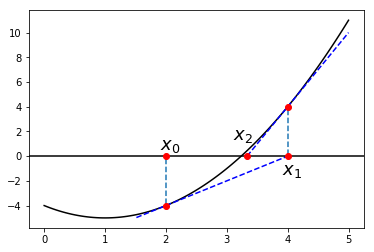

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2 - 2*x - 4
l1 = lambda x: 2*x - 8
l2 = lambda x: 6*x - 20

x = np.linspace(0, 5, 100)
plt.plot(x, f(x), 'black')
r1 = x[30:80]
r2 = x[66:]
plt.plot(r1, l1(r1), 'blue', linestyle='--')
plt.plot(r2, l2(r2), 'blue', linestyle='--')

l = plt.axhline(y=0,xmin=0,xmax=1,color = 'black')
l = plt.axvline(x=2,ymin=2.0/18,ymax=6.0/18, linestyle = '--')
l = plt.axvline(x=4,ymin=6.0/18,ymax=10.0/18, linestyle = '--')

plt.text(1.9,0.5,r"$x_0$", fontsize = 18)
plt.text(3.9,-1.5,r"$x_1$", fontsize = 18)
plt.text(3.1,1.3,r"$x_2$", fontsize = 18)


plt.plot(2,0,marker = 'o', color = 'r' )
plt.plot(2,-4,marker = 'o', color = 'r' )
plt.plot(4,0,marker = 'o', color = 'r' )
plt.plot(4,4,marker = 'o', color = 'r' )
plt.plot(10.0/3,0,marker = 'o', color = 'r' )

plt.show()

我们要猜 $f(x) = x^2 - 2x - 4 = 0$ 的解，从 $x_0 = 4$ 的初始猜测值开始，找到 $f(x)$ 在 $x = x_0$ 处的切线 $y = 2x - 8$, 找到其与 $y = 0$ 的交点 $(4, 0)$，将该交点更新为新的猜测的解 $x_1 = 4$，如此循环。

如下定义牛顿迭代法：

In [4]:
def NewTon(f, s=1, maxiter=100, prt_step=False):
    for i in range(maxiter):
        # 相较于 f.evalf(subs={x:s}), subs() 是更好的将值带入并计算方法
        s = s - f.subs(x, s) / f.diff().subs(x, s)
        if prt_step:
            print("After %d iteration, the solution is updated to %s" % (i+1, s) )
    return s

from sympy.abc import x
f = x**2 - 2*x -4
print(NewTon(f, s=2, maxiter=4, prt_step=True))

After 1 iteration, the solution is updated to 4
After 2 iteration, the solution is updated to 10/3
After 3 iteration, the solution is updated to 68/21
After 4 iteration, the solution is updated to 3194/987
3194/987


Sympy 可以帮助我们求解方程，不要教坏小朋友们哦：

In [7]:
import sympy
sympy.solve(f, x)

[1 + sqrt(5), -sqrt(5) + 1]

https://ryancheunggit.gitbooks.io/calculus-with-python/content/09Optimization.html